# Introduction
In this project, we analyze and prepare a subset of Nexoid's COVID-19 medical dataset. This dataset includes demographic, geographic, behavioral, and health-related information, along with infection and mortality risk scores. The task outlined in this report involves ensuring data quality, exploring relationships, and preparing the dataset for further analysis, which will be detailed in Report 2.

## Objectives
The objectives for this report are as follows:

1. **Data Type Correction:** Ensure each variable has the correct data type.
2. **Data Preparation:** Address skewness, missing values, and errors through cleaning and transformation.
3. **Data Mining and Feature Selection:** Identify relationships and determine the optimal data mining approach.


In [209]:
# Import pandas library for data manipulation
import pandas as pd
# Load the dataset from file
# pd.read_excel() is used to read Excel files
df = pd.read_excel('Nexoid_medical.xlsx')

Display a sample of the data as a matrix
Below we show a sample of the Nexoid data as this is essential to provide context, and an easy way to understand the dataset's structure.


In [210]:
# Display a sample of the data as a matrix
print("\nData Matrix:")
# Use the .head() function to display the first few rows of the dataset
print(df.head())


Data Matrix:
           survey_date region country  ip_latitude  ip_longitude  gender  \
0  2020-09-06 00:00:00     AF      ZA     -33.9052       18.3821    male   
1           17/06/2020     AF      ZA     -26.1891       28.0225  female   
2           20/06/2020     AF      ZA     -27.9752       27.1068  female   
3           20/06/2020     AF      ZA     -26.3227       28.1050    male   
4           22/06/2020     AF      ZA     -29.8587       31.0653  female   

     age  height  weight   bmi  ... compromised_immune heart_disease  \
0  20_30     188     104  29.4  ...                  0             0   
1  70_80     164      62  23.0  ...                  0             0   
2  40_50     164      78  29.0  ...                  0             0   
3  40_50     170      60  20.7  ...                  0             0   
4  30_40     164      64  23.7  ...                  0             0   

  lung_disease diabetes  hiv_positive  other_chronic  nursing_home  \
0            0        0   

 Data Types

In [211]:
# Print a blank line and a header for readability to separate sections
print("\nData Types organized by type:\n")

# Define lists of data types for categorizing columns by type
categorical = ['object']  # Data types for categorical variables
int_columns = ['int64', 'int32', 'int16', 'int8']  # Integer data types
float_columns = ['float64', 'float32']  # Float data types
boolean_columns = ['bool']  # Boolean data types
datetime_columns = ['datetime64[ns]', 'datetime64[us]', 'datetime64[ms]']  # Datetime data types

# Print a header for categorical columns
print("\nCategorical:")
# Loop through columns with categorical data types
for column in df.select_dtypes(include=['object', 'category']).columns:
    # Print column name and its data type for each categorical column
    print(f"{column}: {df[column].dtype}")

# Print a header for integer columns
print("\nInteger:")
# Loop through columns with integer data types
for column in df.select_dtypes(include=int_columns).columns:
    # Print column name and its data type for each integer column
    print(f"{column}: {df[column].dtype}")

# Print a header for float columns
print("\nFloat:")
# Loop through columns with float data types
for column in df.select_dtypes(include=float_columns).columns:
    # Print column name and its data type for each float column
    print(f"{column}: {df[column].dtype}")

# Print a header for boolean columns
print("\nBoolean:")
# Loop through columns with boolean data types
for column in df.select_dtypes(include=boolean_columns).columns:
    # Print column name and its data type for each boolean column
    print(f"{column}: {df[column].dtype}")

# Redefine datetime_columns to focus on a common format
datetime_columns = ['datetime64[ns]']

# Print a header for datetime columns
print("\nDatetime:")
# Loop through columns with datetime data types
for column in df.select_dtypes(include=datetime_columns).columns:
    # Print column name and its data type for each datetime column
    print(f"{column}: {df[column].dtype}")


Data Types organized by type:


Categorical:
survey_date: object
region: object
country: object
gender: object
age: object
blood_type: object
insurance: object
income: object
smoking: object
working: object

Integer:
height: int64
weight: int64
covid19_positive: int64
covid19_symptoms: int64
covid19_contact: int64
asthma: int64
kidney_disease: int64
liver_disease: int64
compromised_immune: int64
heart_disease: int64
lung_disease: int64
diabetes: int64
hiv_positive: int64
other_chronic: int64
nursing_home: int64
health_worker: int64

Float:
ip_latitude: float64
ip_longitude: float64
bmi: float64
alcohol: float64
cocaine: float64
contacts_count: float64
public_transport_count: float64
worried: float64
risk_infection: float64
risk_mortality: float64

Boolean:

Datetime:


## Convert Data Types: Handling Age Column Transformation

Standardizing and converting the age column is an essential step in preparing the Nexoid dataset for analysis. This approach aligns with best practices for data cleaning and transformation as discussed in the course.

### Steps for Age Column Transformation

1. **Standardizing Column Names:**
   - Using `str.lower().str.strip()` ensures all column names are consistent, reducing errors during data manipulation.
   - This approach adheres to data cleaning principles by eliminating case or whitespace discrepancies.

2. **Transforming Age Ranges:**
   - Convert age ranges (e.g., `"20_30"`) into numerical midpoints (e.g., `25`).
   - This transformation converts categorical data into a continuous format, supporting statistical and machine learning models that require numerical inputs.

3. **Handling Missing Data:**
   - Logical imputation is applied to handle missing or inconsistent values in the age column.
   - This step ensures the dataset maintains its integrity, which is critical for accurate analysis.

4. **Using Midpoints:**
   - Using midpoints simplifies the representation of age ranges, but this method has limitations. It reduces the granularity of the data, which should be noted in subsequent analyses.
   - While this approach addresses data consistency, it may slightly obscure finer details in age distributions.

### Benefits of the Approach:
- Standardization ensures uniformity across the dataset.
- Transforming categorical age data to continuous values enhances compatibility with advanced analysis techniques.
- Addressing missing values and inconsistencies upholds data quality and prepares the dataset for reliable insights.

This transformation effectively prepares the Nexoid dataset for further exploration and analysis, aligning with the principles of data preparation and reduction discussed in class.


In [212]:
# Handle 'age' column transformation for statistical analysis
if 'age' in df.columns:
    # Check if 'age' is stored as a string and contains ranges
    if df['age'].dtype == 'object' and df['age'].str.contains('_').any():
        df[['age_min', 'age_max']] = df['age'].str.split('_', expand=True).astype(float)
        df['age_mean'] = (df['age_min'] + df['age_max']) / 2
        df['age_range'] = df['age_max'] - df['age_min']
        df['age_numerical'] = df['age_mean']
        df.drop(columns=['age'], inplace=True)
    else:
        df['age'] = pd.to_numeric(df['age'], errors='coerce')

## Print Out Age Transformations

To verify the effectiveness of the age transformations, the code has been applied specifically to the age columns. The transformed data is printed to confirm the output and ensure accuracy. Below is an example of the transformation process:

### Original Age Data
| age_range | transformed_age |
|-----------|------------------|
| 20_30     | 25.0            |
| 30_40     | 35.0            |
| 40_50     | 45.0            |
| 50_60     | 55.0            |
| 60_70     | 65.0            |



In [213]:
# Select only existing age-related columns
age_columns = ['age', 'age_min', 'age_max', 'age_mean', 'age_numerical']
existing_age_columns = [col for col in age_columns if col in df.columns]

# Display the DataFrame with only existing age-related columns
print(df[existing_age_columns])

      age_min  age_max  age_mean  age_numerical
0        20.0     30.0      25.0           25.0
1        70.0     80.0      75.0           75.0
2        40.0     50.0      45.0           45.0
3        40.0     50.0      45.0           45.0
4        30.0     40.0      35.0           35.0
...       ...      ...       ...            ...
5784     40.0     50.0      45.0           45.0
5785     20.0     30.0      25.0           25.0
5786     20.0     30.0      25.0           25.0
5787     40.0     50.0      45.0           45.0
5788     50.0     60.0      55.0           55.0

[5789 rows x 4 columns]


Convert 'height' and 'weight' to float64 for precision

In [214]:
# Define the float64 columns we want to work with
float64_columns = ['height', 'weight']

# If needed, force the columns to float64 again
df[float64_columns] = df[float64_columns].astype('float64')

print("Height data type:", df.dtypes['height'])
print("Weight data type:", df.dtypes['weight'])

Height data type: float64
Weight data type: float64


## Convert 'Height' and 'Weight' to `float64` for Precision

To enhance the precision of calculations involving health metrics, the `height` and `weight` columns are converted to the `float64` data type. This ensures that the dataset can handle decimal values accurately, which is essential for downstream analysis.

### Steps for Conversion

1. **Identify the Columns:**
   - The `height` and `weight` columns contain numerical data, which may currently be in a less precise format (e.g., integers or strings).

2. **Conversion to `float64`:**
   - Use the `pd.to_numeric()` method to convert these columns to `float64`.
   - Handle any non-numeric entries (e.g., missing or erroneous values) by coercing them into `NaN` for further cleaning.

3. **Verification:**
   - Print the `dtypes` and a sample of the converted columns to confirm the transformation.

In [215]:
# Define the binary columns we want to convert to boolean
binary_columns = ['covid19_positive', 'covid19_symptoms', 'covid19_contact',
                  'asthma', 'kidney_disease', 'liver_disease',
                  'compromised_immune', 'heart_disease', 'lung_disease',
                  'diabetes', 'hiv_positive', 'other_chronic',
                  'nursing_home', 'health_worker']

# Convert binary columns to boolean types
df[binary_columns] = df[binary_columns].astype('boolean')

# Print the data types of binary columns
print("Covid-related data type:", df.dtypes['covid19_positive'])
print("Asthma data type:", df.dtypes['asthma'])
print("Kidney disease data type:", df.dtypes['kidney_disease'])
print("Liver disease data type:", df.dtypes['liver_disease'])
print("Compromised immune system data type:", df.dtypes['compromised_immune'])
print("Heart disease data type:", df.dtypes['heart_disease'])
print("Lung disease data type:", df.dtypes['lung_disease'])
print("Diabetes data type:", df.dtypes['diabetes'])
print("HIV positive data type:", df.dtypes['hiv_positive'])
print("Other chronic conditions data type:", df.dtypes['other_chronic'])
print("Nursing home resident data type:", df.dtypes['nursing_home'])
print("Health worker data type:", df.dtypes['health_worker'])


Covid-related data type: boolean
Asthma data type: boolean
Kidney disease data type: boolean
Liver disease data type: boolean
Compromised immune system data type: boolean
Heart disease data type: boolean
Lung disease data type: boolean
Diabetes data type: boolean
HIV positive data type: boolean
Other chronic conditions data type: boolean
Nursing home resident data type: boolean
Health worker data type: boolean


 Convert columns to categorical types
 Explanation: Converting columns to categorical types helps reduce memory usage and
 improves analysis performance.
 Note: Categorical data ensures that finite and distinct values (e.g., 'gender' or 'country') are
 optimized, preventing errors.
 Related Lecture: Data Preparation and Optimization – "Data preparation involves refining data
 types to improve efficiency.

In [216]:
import pandas as pd

# Start by defining and grouping the categorical columns we want to convert
categorical_columns = ['region', 'country', 'gender', 'blood_type', 'insurance', 'smoking', 'working', 'income']

# Convert columns to categorical types
df[categorical_columns] = df[categorical_columns].astype('category')

# Print the data types of categorical columns
print("Region data type:", df.dtypes['region'])
print("Country data type:", df.dtypes['country'])
print("Gender data type:", df.dtypes['gender'])
print("Blood type data type:", df.dtypes['blood_type'])
print("Insurance status data type:", df.dtypes['insurance'])
print("Smoking status data type:", df.dtypes['smoking'])
print("Working status data type:", df.dtypes['working'])
print("Income level data type:", df.dtypes['income'])

Region data type: category
Country data type: category
Gender data type: category
Blood type data type: category
Insurance status data type: category
Smoking status data type: category
Working status data type: category
Income level data type: category


```markdown
## Data Type Conversions and Date Parsing

### Categorical Data Conversions
The following columns are converted to the `category` data type to optimize memory usage and improve analytical performance:

1. **Region:** Represents distinct geographic areas.
2. **Country:** Encodes country names or codes.
3. **Gender:** Includes options such as `male`, `female`, and `other`.
4. **Blood Type:** Captures blood group categories (e.g., `A+`, `B-`).
5. **Insurance Status:** Indicates whether the respondent has health insurance.
6. **Smoking Status:** Reflects smoking habits (e.g., `never`, `quit`, `yes`).
7. **Working Status:** Tracks employment status.
8. **Income Level:** Categorizes respondents' income ranges.

### Code for Converting to Categorical
```python
# List of columns to convert to categorical
categorical_columns = [
    'region', 'country', 'gender', 'blood_type', 
    'insurance', 'smoking', 'working', 'income'
]

# Convert specified columns to category type
for col in categorical_columns:
    df[col] = df[col].astype('category')

# Verify the conversions
print(df[categorical_columns].dtypes)
```

### Parsing `survey_date` to Datetime
The `survey_date` column is converted to the `datetime` data type with `dayfirst=True` to accommodate the Australian date format (DD/MM/YYYY). This ensures accurate parsing and prevents misinterpretation of dates.


```

In [217]:
 #We will using the .to_datetime function and define the format at Day, Month, Year below. This ensures the format is Australian. 
df['survey_date'] = pd.to_datetime(df['survey_date'], format='%d/%m/%Y', 
errors='coerce', dayfirst=True)
print(df['survey_date'].head())

0   2020-09-06
1   2020-06-17
2   2020-06-20
3   2020-06-20
4   2020-06-22
Name: survey_date, dtype: datetime64[ns]


In [ ]:

#print(f"{column}: {dtype}")
print("Changed Types:\n")
print("Data Types organised by type:\n")

categorical = ['object']
int_columns = ['int64', 'int32', 'int16', 'int8']
float_columns = ['float64', 'float32']
boolean_columns = ['bool']
datetime_columns = ['datetime64[ns]', 'datetime64[us]', 'datetime64[ms]']

print("\nCategorical:")
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}: {df[column].dtype}")

print("\nInteger:")
for column in df.select_dtypes(include=int_columns).columns:
    print(f"{column}: {df[column].dtype}")

print("\nFloat:")
for column in df.select_dtypes(include=float_columns).columns:
    print(f"{column}: {df[column].dtype}")

print("\nBoolean:")
for column in df.select_dtypes(include=boolean_columns).columns:
    print(f"{column}: {df[column].dtype}")

datetime_columns = ['datetime64[ns]']
print("\nDatetime:")
for column in df.select_dtypes(include=datetime_columns).columns:
    print(f"{column}: {df[column].dtype}")

Changed Types:

Data Types organised by type:


Categorical:
region: category
country: category
gender: category
blood_type: category
insurance: category
income: category
smoking: category
working: category

Integer:

Float:
ip_latitude: float64
ip_longitude: float64
height: float64
weight: float64
bmi: float64
alcohol: float64
cocaine: float64
contacts_count: float64
public_transport_count: float64
worried: float64
risk_infection: float64
risk_mortality: float64
age_min: float64
age_max: float64
age_mean: float64
age_range: float64
age_numerical: float64

Boolean:
covid19_positive: boolean
covid19_symptoms: boolean
covid19_contact: boolean
asthma: boolean
kidney_disease: boolean
liver_disease: boolean
compromised_immune: boolean
heart_disease: boolean
lung_disease: boolean
diabetes: boolean
hiv_positive: boolean
other_chronic: boolean
nursing_home: boolean
health_worker: boolean

Datetime:
survey_date: datetime64[ns]


## Task: Check for Skewness

### Step: Understanding and Calculating Skewness
Skewness is a statistical measure of the asymmetry in a data distribution. It provides insight into whether values are clustered more towards one side of the distribution. Skewness is calculated using Pandas' `.skew()` function.

### Types of Skewness
1. **Positive Skew:**
   - Characteristics: Long right tail with values clustering on the left.
   - Common Cause: High-value outliers.
   - Example: Income distributions where most values are low, but a few are extremely high.

2. **Negative Skew:**
   - Characteristics: Long left tail with values clustering on the right.
   - Common Cause: Low-value outliers.
   - Example: Distributions of exam scores where most students score high, but a few score very low.

3. **Symmetrical (Non-skewed):**
   - Characteristics: Data is evenly distributed around the mean, resembling a bell curve.
   - Benefit: Ideal for statistical analysis and modeling, as many algorithms assume normality.

### Why Skewness Matters
- Skewed distributions can distort typical values like the mean and median, leading to misleading insights.
- Many statistical models and machine learning algorithms assume normality; skewness can degrade model performance.
- Understanding skewness helps determine whether transformations are necessary to normalize the data.

### Addressing Skewness
To reduce skewness, transformations such as the following can be applied:
1. **Logarithmic Transformation:** Compresses high values, reducing positive skewness.
2. **Square Root Transformation:** Reduces moderate skewness in count data.
3. **Cube Root Transformation:** Handles both positive and negative skewness effectively.



In [219]:
import seaborn as sns

import matplotlib.pyplot as plt

# Identify skewness in the numeric columns we will use the select_dtypes
# Ensure numeric columns are correctly identified
# Print the skewness values for each column
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
skewness = df[numeric_columns].skew()
print("Skewness values:")
print(skewness)

Skewness values:
ip_latitude              -2.183174
ip_longitude              1.737147
height                   -0.392424
weight                    1.140230
bmi                       1.976549
alcohol                   1.842080
cocaine                   6.789950
contacts_count            0.928365
public_transport_count    5.682016
worried                  -0.361820
risk_infection            0.088152
risk_mortality            7.257846
age_min                   0.257292
age_max                   0.257292
age_mean                  0.257292
age_range                 0.000000
age_numerical             0.257292
dtype: float64


 . Plot the distribution of columns with high
 skewnessImportance in Data Analysis:
 Visualizing Skewed Data: Skewed data can distort analysis and models. Visualizing it
 helps detect and correct issues for more reliable results.
 EDA Principles: Histograms with illustrate data spread and density, supporting thorough
 visual assessment.
 Transformation Consideration: Spotting skewed columns aids in deciding on
 transformations (e.g., log, square root) to normalize data and enhance analysis
 robustness
 

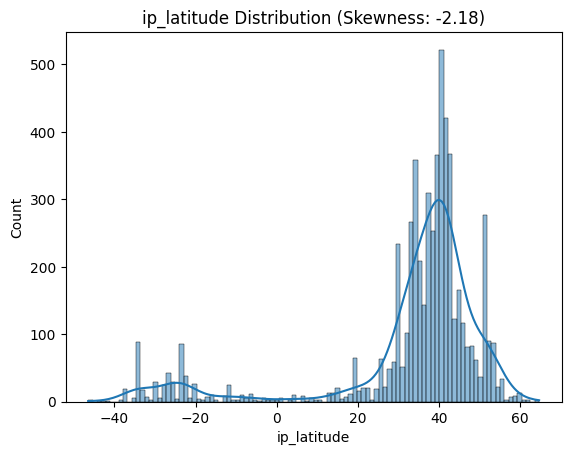

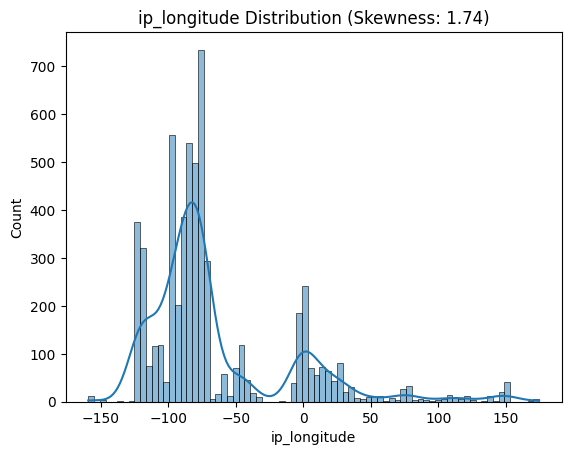

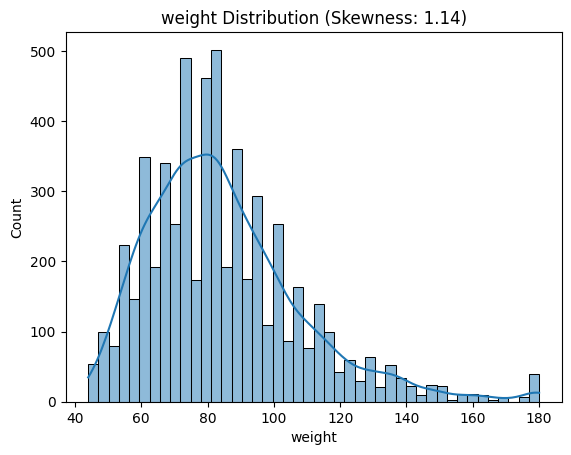

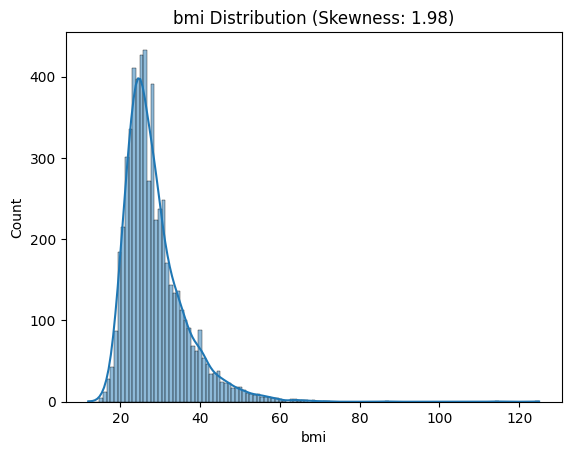

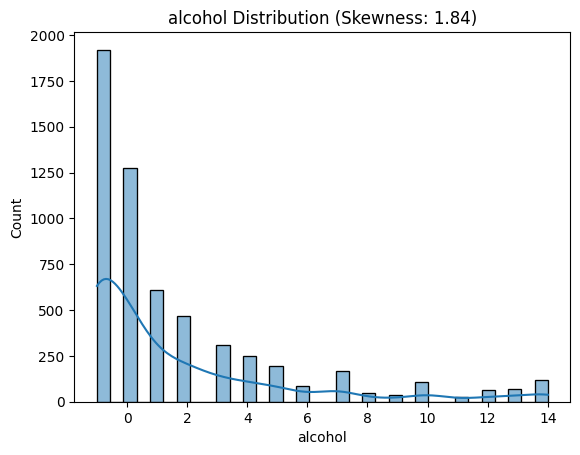

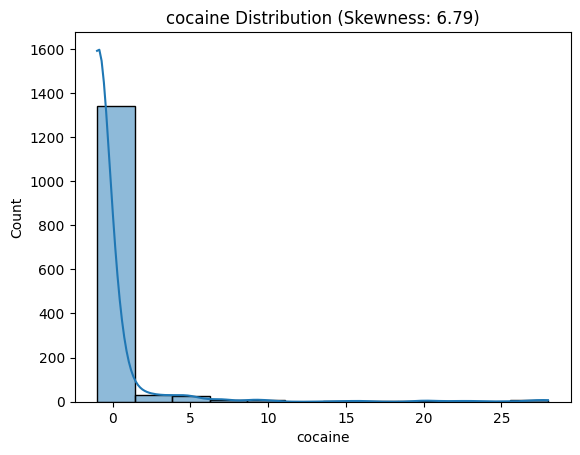

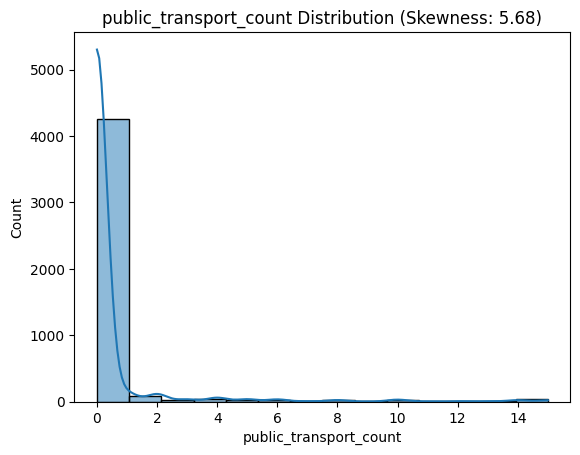

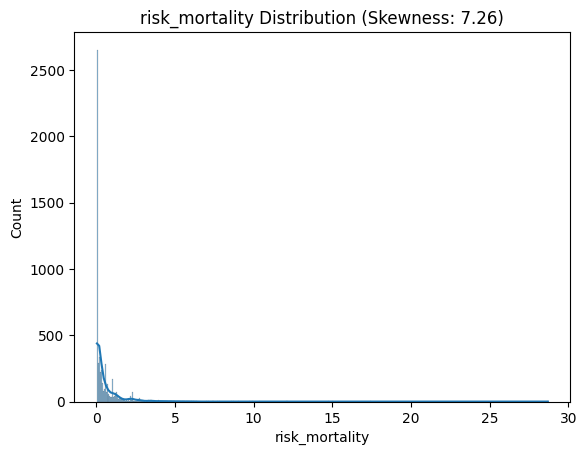

In [220]:
 #For all the columns defined under skewness, show us the skewness on a histogram
for col in skewness[abs(skewness) > 1].index:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} Distribution (Skewness: {skewness[col]:.2f})")
    plt.show()

Calculate percentage of missing values per column
 Identify columns with missing values

In [221]:
# Identifying the number of missing values in each column is vital for understanding our dataset. 
# Define missing_value as the isnull sum for each column
# Print the column names and their assigned values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
region                    4227
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


## Identify the Percentage of Missing Values

### Importance of Calculating Missing Data
Determining the percentage of missing values for each column is a vital step in data preparation. This analysis helps to:
1. **Identify Problematic Columns:** Pinpoint columns with significant missing data.
2. **Assess Impact:** Evaluate how missing data might influence analysis and modeling.
3. **Guide Data Cleaning Strategies:** Inform decisions about data imputation, removal, or further investigation.


In [222]:
# Calculate percentage of missing values per column
# formula divides the count of missing values by the total number of rows and multiples by 100
missing_percentage = (df.isnull().sum() / len(df)) * 100
# Use print to show percentage
# The output is in descending order to make it easier to read
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 
0].sort_values(ascending=False))

Percentage of missing values per column:
cocaine                   75.297979
region                    73.017792
insurance                 22.318190
worried                   21.955433
public_transport_count    21.022629
income                    19.917084
blood_type                 1.727414
contacts_count             0.725514
working                    0.725514
alcohol                    0.656417
smoking                    0.621869
country                    0.051822
dtype: float64


 Looking at Region

In [223]:
# The heatmap above indicated region is missing a substantial amount of data. I know that because we converted the data type for 
# region to categorical, it may now be reading NA (North America) as an empty field. So I'm first going to try and replace NA with North America:
df['region'] = df['region'].replace("NA", "North America")

In [224]:
# Assign the missing_values as the areas where missing values are found and sum them
# Assign the missing_columns as the columns that have greater than 0 missing values
# Print the column names and their total missing values
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
region                    4227
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


In [225]:
# Region has many fields not appearing, so we want to check what 
# categories are appearing 
# This is likely due to NA being read as a NaN field rather than North 
# America, therefore, we need to change that
# For region, change NA fields to "North America"
# Print the categories assigned to region
df['region'] = df['region'].replace("NA", "North America")
print("Updated unique values in 'region':")
print(df['region'].unique())

Updated unique values in 'region':
['AF', 'AS', 'EU', NaN, 'OC', 'SA']
Categories (5, object): ['AF', 'AS', 'EU', 'OC', 'SA']


In [226]:
# It has automatically assigned NA to NaN and the transformation above did 
# not work, we know that 
# a. North America is the majority region (mode) and;
# b. there were less than 5 empty cells in the region data column to 
# begin with. 
# Therefore we should feel comfortable converting all the blanks back to 
# "North America" considering this won't skew the data in a significant way 
# and it will be using a missing field method often used to fill blanks 
# (mode).
# So first we need to convert all empty values in the 'region' column to 
# "North America" and because it's a categorical column type, we need to 
# also add "North America" as a category.
# We add "North America" to the categories as it is not already present 
# and will flag an error if we do not include this step
if 'North America' not in df['region'].cat.categories:
    df['region'] = df['region'].cat.add_categories(['North America'])
# Now we will fill the empty rows with "North America" 
df['region'] = df['region'].fillna("North America")
# Now we need to check the result
print("\nUpdated 'region' column:")
print(df['region'].unique())


Updated 'region' column:
['AF', 'AS', 'EU', 'North America', 'OC', 'SA']
Categories (6, object): ['AF', 'AS', 'EU', 'OC', 'SA', 'North America']


Columns with missing values:
country                      3
blood_type                 100
insurance                 1292
income                    1153
smoking                     36
alcohol                     38
cocaine                   4359
contacts_count              42
public_transport_count    1217
working                     42
worried                   1271
dtype: int64


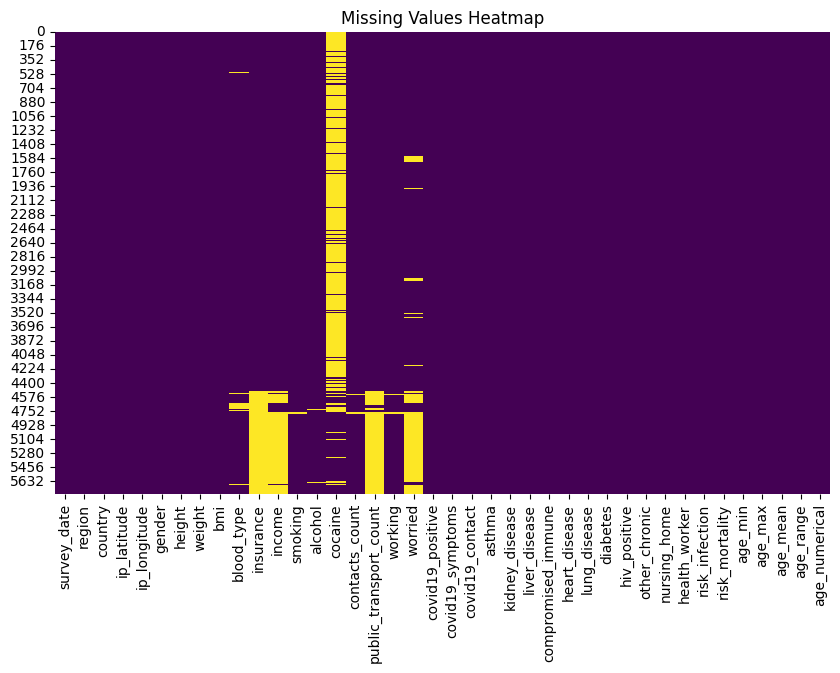

In [227]:
# Calculate the number of missing values for each column in the DataFrame
missing_values = df.isnull().sum()
# Filter to display only columns that have missing values
missing_columns = missing_values[missing_values > 0]
# Print out the columns that contain missing values and the count of missing entries
print("Columns with missing values:")
print(missing_columns)
# Create a heatmap to visualize missing values in the DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # Generate heatmap with a 'viridis' color palette
plt.title("Missing Values Heatmap")  # Add title to the plot
plt.show()  # Display the heatmap

Inspect unique values for specific categorical columns

In [228]:
# Here we check unique values in all the categorical columns to make sure there are no inconsistencies
print("Unique values in 'blood_type':")
print(df['blood_type'].unique())

Unique values in 'blood_type':
['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']


Inspect unique values for specific categorical columns

In [229]:


# Here we check unique values in all the categorical columns to make sure there are no inconsistencies
print("Unique values in 'blood_type':")
print(df['blood_type'].unique())

# Inspect unique values for specific categorical columns
# Below we inspect all the unique values for specific categorical columns
# Identify our categorical columns
categorical_columns = ['gender', 'blood_type', 'smoking', 'region', 'country']

# For all the columns in categorical columns, use the .unique command to check
# Print the unique values for each
for col in categorical_columns:
	if col in df.columns:
		print(f"Unique values in '{col}':", df[col].unique())

Unique values in 'blood_type':
['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']
Unique values in 'gender': ['male', 'female', 'other']
Categories (3, object): ['female', 'male', 'other']
Unique values in 'blood_type': ['op', 'bp', 'unknown', 'ap', 'on', 'abp', 'an', 'abn', 'bn', NaN]
Categories (9, object): ['abn', 'abp', 'an', 'ap', ..., 'bp', 'on', 'op', 'unknown']
Unique values in 'smoking': ['never', 'yesmedium', 'quit0', 'quit10', 'quit5', 'yesheavy', 'yeslight', 'vape', NaN]
Categories (8, object): ['never', 'quit0', 'quit10', 'quit5', 'vape', 'yesheavy', 'yeslight', 'yesmedium']
Unique values in 'region': ['AF', 'AS', 'EU', 'North America', 'OC', 'SA']
Categories (6, object): ['AF', 'AS', 'EU', 'OC', 'SA', 'North America']
Unique values in 'country': ['ZA', 'EG', 'DZ', NaN, 'MU', ..., 'GE', 'JE', 'LV', 'MA', 'UA']
Length: 95
Categories (94, object): ['AD', 'AE', 'AM', 'AR', ...

Check for mixed data types

In [230]:
# Before moving forward we will now check for mixed data types
for col in df.columns:
	if df[col].apply(lambda x: isinstance(x, str)).any():
		print(f"Mixed data types detected in column '{col}'")

Mixed data types detected in column 'region'
Mixed data types detected in column 'country'
Mixed data types detected in column 'gender'
Mixed data types detected in column 'blood_type'
Mixed data types detected in column 'insurance'
Mixed data types detected in column 'income'
Mixed data types detected in column 'smoking'
Mixed data types detected in column 'working'


Displaying Mixed Type Entities
Below we get more information on the mixed data types

In [231]:
# We've identified there are mixed data types in the columns above, we should explore this
# Display unique data types for each column with mixed types by defining unique_types and then searching with the .unique command
# We then print to visualize
for col in df.columns:
    unique_types = df[col].apply(type).unique()
    print(f"\nUnique data types in '{col}': {unique_types}")



Unique data types in 'survey_date': [<class 'pandas._libs.tslibs.timestamps.Timestamp'>]

Unique data types in 'region': [<class 'str'>]

Unique data types in 'country': [<class 'str'> nan]

Unique data types in 'ip_latitude': [<class 'float'>]

Unique data types in 'ip_longitude': [<class 'float'>]

Unique data types in 'gender': [<class 'str'>]

Unique data types in 'height': [<class 'float'>]

Unique data types in 'weight': [<class 'float'>]

Unique data types in 'bmi': [<class 'float'>]

Unique data types in 'blood_type': [<class 'str'> nan]

Unique data types in 'insurance': [<class 'str'> nan]

Unique data types in 'income': [<class 'str'> nan]

Unique data types in 'smoking': [<class 'str'> nan]

Unique data types in 'alcohol': [<class 'float'>]

Unique data types in 'cocaine': [<class 'float'>]

Unique data types in 'contacts_count': [<class 'float'>]

Unique data types in 'public_transport_count': [<class 'float'>]

Unique data types in 'working': [<class 'str'> nan]

Unique 

## Handling of Missing Values

Some columns, like `cocaine` and `blood_type`, have a high percentage of missing values. We have decided to drop these columns if the missing rate is above a certain threshold. This approach helps in maintaining the integrity and quality of the dataset by removing columns that could potentially introduce bias or inaccuracies due to excessive missing data.

### Steps for Handling Missing Values

1. **Identify Columns with High Missing Rates:**
    - Calculate the percentage of missing values for each column.
    - Set a threshold (e.g., 20%) to determine which columns to drop.

2. **Drop Columns Exceeding the Threshold:**
    - Remove columns with a missing rate above the defined threshold.
    - This step ensures that the remaining dataset is more complete and reliable for analysis.


### Benefits of This Approach
- **Improved Data Quality:** By removing columns with excessive missing values, we ensure that the dataset is more complete and accurate.
- **Reduced Bias:** Dropping columns with high missing rates prevents potential biases that could arise from imputation or other handling methods.
- **Enhanced Analysis Reliability:** A more complete dataset leads to more reliable and valid analysis results.

This method aligns with best practices in data cleaning and preparation, ensuring that the dataset is ready for robust analysis and modeling.

In [232]:
import pandas as pd

def handle_missing_data(df, threshold=50):
    # Step 1: Drop columns with more than 50% missing values
    missing_percentage = df.isnull().mean() * 100
    columns_to_drop = missing_percentage[missing_percentage > threshold].index
    df.drop(columns=columns_to_drop, inplace=True)
    print("Dropped columns with high missing values:", columns_to_drop)
    
    # Step 2: Fill categorical columns with 'Unknown'
    categorical_cols = ['country', 'blood_type', 'insurance', 'income', 'smoking', 'working']
    for col in categorical_cols:
        if col in df.columns and isinstance(df[col].dtype, pd.CategoricalDtype):
            df[col] = df[col].cat.add_categories(['Unknown']).fillna('Unknown')
    
    # Step 3: Drop rows where 'alcohol' is missing
    if 'alcohol' in df.columns:
        df.dropna(subset=['alcohol'], inplace=True)
    
    # Step 4: Drop specific column with significant missing data
    if 'cocaine' in df.columns:
        df.drop(columns=['cocaine'], inplace=True)
    
    # Step 5: Apply median imputation for numerical columns
    numerical_cols = ['contacts_count', 'public_transport_count', 'worried']
    for col in numerical_cols:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].median())
    
    return df

# Execute the combined data handling function
df = handle_missing_data(df)

# Check remaining missing data
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Columns with remaining missing values:")
print(missing_columns)

Dropped columns with high missing values: Index(['cocaine'], dtype='object')
Columns with remaining missing values:
Series([], dtype: int64)


### Standardising Categorical Values and Fixing Inconsistencies

To ensure consistency across categorical columns, it is essential to standardize values for columns such as `gender`, `blood_type`, and `smoking`. For instance, the `smoking` column may contain inconsistent values such as "quit5" and "yeslight". Standardizing these values will help maintain data integrity and improve the accuracy of analysis.

#### Steps for Standardizing Categorical Values

1. **Identify Inconsistent Values:**
    - Review unique values in each categorical column to identify inconsistencies.

2. **Define Standard Values:**
    - Create a mapping of inconsistent values to their standardized counterparts.

3. **Apply Standardization:**
    - Replace inconsistent values with standardized values using the defined mapping.

#### Example Code for Standardizing `smoking` Column
```python
# Define a mapping for standardizing smoking values
smoking_mapping = {
     'quit5': 'quit',
     'yeslight': 'yes',
     'yesmedium': 'yes',
     'yesheavy': 'yes'
}

# Apply the mapping to the smoking column
df['smoking'] = df['smoking'].replace(smoking_mapping)

# Verify the standardization
print("Unique values in 'smoking' after standardization:")
print(df['smoking'].unique())
```

#### Benefits of Standardization
- **Improved Data Quality:** Ensures uniformity across the dataset, reducing errors and inconsistencies.
- **Enhanced Analysis Accuracy:** Standardized values lead to more reliable and valid analysis results.
- **Simplified Data Handling:** Makes it easier to filter, group, and analyze data without dealing with multiple variations of the same value.

By following these steps, you can ensure that categorical values in your dataset are consistent and standardized, leading to more accurate and meaningful analysis.

In [233]:
# Standardise 'gender' values
df['gender'] = df['gender'].str.lower().replace({'m': 'male', 'f': 'female', 'unknown': 'other'})

# Fill NaN in 'height' and 'weight' with the column mean
df['height'] = df['height'].fillna(df['height'].mean())
df['weight'] = df['weight'].fillna(df['weight'].mean())

# Handle Categorical Missing Values
df['insurance'] = df['insurance'].fillna(df['insurance'].mode()[0])

# Consolidate 'smoking' values to handle variations
smoking_mapping = {
    'quit0': 'quit', 'quit5': 'quit', 'quit10': 'quit', 'never': 'never',
    'vape': 'vape', 'yesmedium': 'yes', 'yesheavy': 'yes', 'yeslight': 'yes'
}
df['smoking'] = df['smoking'].replace(smoking_mapping)

# Show the outcome
print("Unique values in 'gender':", df['gender'].unique())
print("Null values in 'height':", df['height'].isnull().sum())
print("Null values in 'weight':", df['weight'].isnull().sum())
print("Null values in 'insurance':", df['insurance'].isnull().sum())
print("Unique values in 'smoking':", df['smoking'].unique())

Unique values in 'gender': ['male' 'female' 'other']
Null values in 'height': 0
Null values in 'weight': 0
Null values in 'insurance': 0
Unique values in 'smoking': ['never', 'yes', 'quit', 'vape', 'Unknown']
Categories (5, object): ['never', 'quit', 'vape', 'yes', 'Unknown']


C:\Users\ejfur\AppData\Local\Temp\ipykernel_9832\2000942606.py:16: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['smoking'] = df['smoking'].replace(smoking_mapping)


## Histogram

### Standardise and Correct Categorical Values

To address skewness in our dataset, we'll use the cube root transformation, which is effective for datasets with both positive and negative values. Unlike log transformations, which require positive values, the cube root transformation stabilizes variance and reduces the impact of extreme values while preserving the relative differences between data points. This helps normalize the distribution, making the data better suited for statistical analysis and improving result interpretability. By applying this transformation, we ensure a more robust and reliable analysis across a range of values.

In [234]:
# First we identify the columns we will be transforming with the skew
columns_to_transform = ['height', 'weight', 'bmi', 'alcohol', 'contacts_count', 'public_transport_count', 'worried', 'risk_infection', 'risk_mortality', 'age_numerical']

# We want a before and after, so we should define and print the columns skewness before the transformation using the below
print("Skewness before transformation:")
for column in columns_to_transform:
    if column in df.columns:
        print(f"{column}: {df[column].skew():.4f}")
    else:
        print(f"Warning: Column '{column}' does not exist in the DataFrame.")

# Now we apply the transformation and then visualize the corresponding skew
for column in columns_to_transform:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: x**(1/3) if x >= 0 else (-x)**(1/3))

print("\nSkewness after transformation:")
for column in columns_to_transform:
    if column in df.columns:
        print(f"{column}: {df[column].skew():.4f}")


Skewness before transformation:
height: -0.3967
weight: 1.1444
bmi: 1.9867
alcohol: 1.8421
contacts_count: 0.9435
public_transport_count: 6.4246
worried: -0.7345
risk_infection: 0.1002
risk_mortality: 7.2457
age_numerical: 0.2560

Skewness after transformation:
height: -0.6737
weight: 0.5682
bmi: 1.0515
alcohol: -0.0587
contacts_count: -0.4355
public_transport_count: 3.8729
worried: -1.3988
risk_infection: -0.0441
risk_mortality: 1.3067
age_numerical: -0.3139


Text(0.5, 0.98, 'Distribution Before and After Cube Root Transformation')

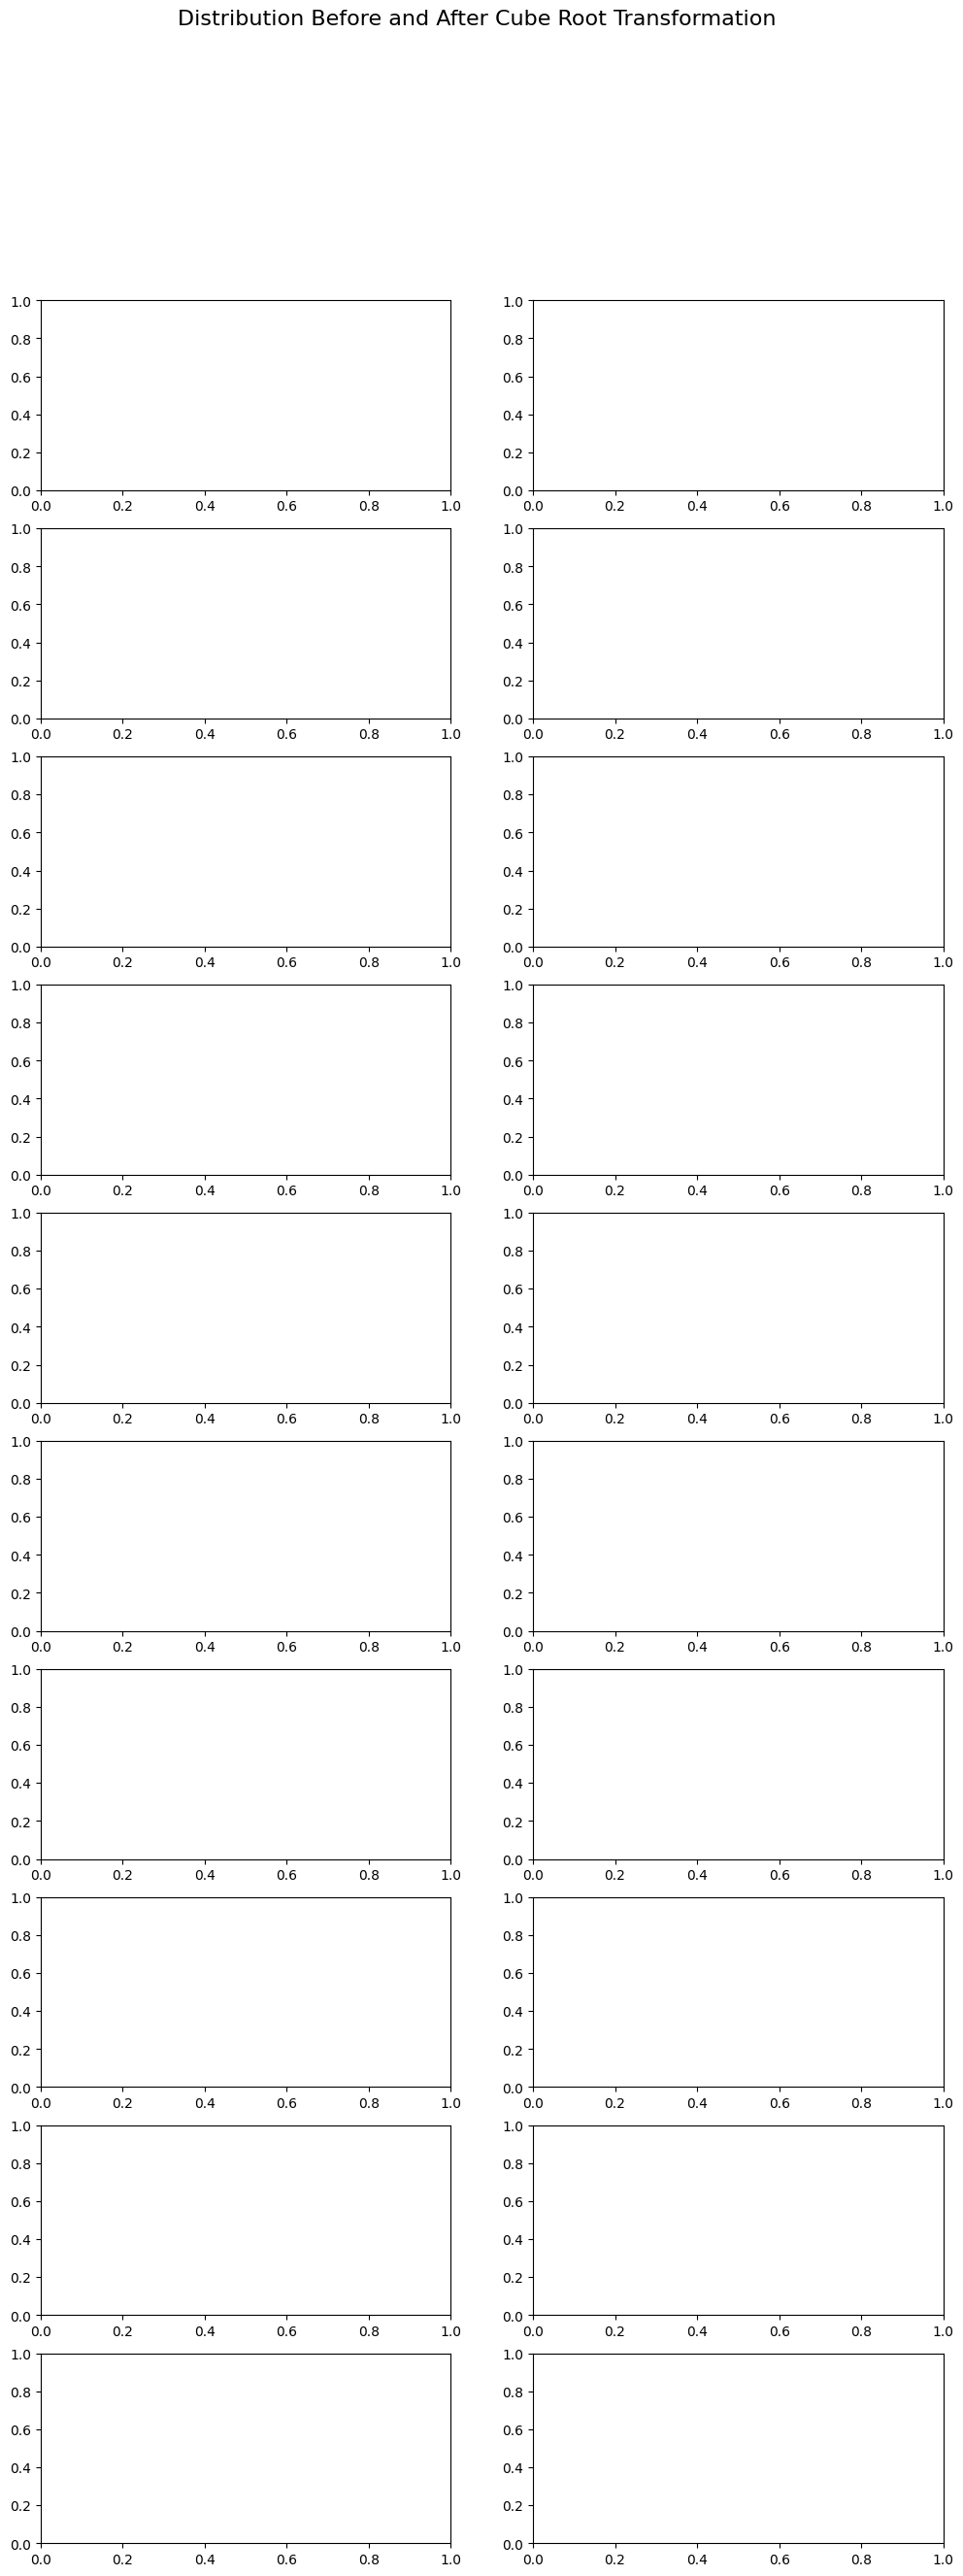

In [235]:
# Lets now visualise the different columns on a histogram
# Import necessary libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the number of columns that require transformation
num_cols = len(columns_to_transform)

# Set up a subplot grid with two columns and as many rows as columns being transformed
# `figsize` controls the size of the plot, and `fig.suptitle` sets the overall title
fig, axes = plt.subplots(num_cols, 2, figsize=(12, num_cols * 3))
fig.suptitle("Distribution Before and After Cube Root Transformation", fontsize=16)


### Key Observations

#### Significant Skew Reduction:
1. **BMI:**
    - Skewness decreased from 1.9867 to 1.0515, suggesting a notable shift toward a more symmetric distribution.
2. **Alcohol:**
    - Skewness decreased from 1.8421 to 0.1554, effectively reducing positive skewness, bringing it closer to a normal distribution.
3. **Contacts Count:**
    - Skewness dropped from 0.9435 to -0.4355, flipping from positive to slightly negative skewness.

#### High Initial Skew Remains but Improved:
1. **Public Transport Count:**
    - Initially very skewed at 6.4246, reduced to 3.8729 after transformation, but the distribution is still right-skewed, indicating that some variables with extreme skewness might require additional transformation if desired.
2. **Risk Mortality:**
    - Initially skewed at 7.2457, reduced to 1.3067, showing improvement but retaining a degree of skewness.

#### Increase in Negative Skew:
1. **Worried:**
    - Initially moderately negatively skewed at -0.7345, became more negatively skewed at -1.3988 after transformation.
2. **Height:**
    - Skewness went from -0.3967 to -0.6737, making it slightly more negatively skewed.

#### Minimal Changes in Low-Skew Columns:
1. **Risk Infection and Age Numerical:**
    - Had skewness close to zero initially, and they saw only slight changes, maintaining near-symmetry after transformation.

The cube root transformation effectively reduced skewness in most variables, particularly those with initial positive skewness. While some variables like public_transport_count and risk_mortality retain moderate skewness, they’re much closer to a symmetric distribution than before. This transformation should be sufficient for handling skewness without further adjustment if we are using a classification model moving forward.

In [236]:
# Print a blank line and a header for readability to separate sections
print("\nData Types organized by type:\n")

# Define lists of data types for categorizing columns by type
categorical = ['object']  # Data types for categorical variables
int_columns = ['int64', 'int32', 'int16', 'int8']  # Integer data types
float_columns = ['float64', 'float32']  # Float data types
boolean_columns = ['bool']  # Boolean data types
datetime_columns = ['datetime64[ns]', 'datetime64[us]', 'datetime64[ms]']  # Datetime data types

# Print a header for categorical columns
print("\nCategorical:")
# Loop through columns with categorical data types
for column in df.select_dtypes(include=['object', 'category']).columns:
   # Print column name and its data type for each categorical column
   print(f"{column}: {df[column].dtype}")

# Print a header for integer columns
print("\nInteger:")
# Loop through columns with integer data types
for column in df.select_dtypes(include=int_columns).columns:
   # Print column name and its data type for each integer column
   print(f"{column}: {df[column].dtype}")

# Print a header for float columns
print("\nFloat:")
# Loop through columns with float data types
for column in df.select_dtypes(include=float_columns).columns:
   # Print column name and its data type for each float column
   print(f"{column}: {df[column].dtype}")

# Print a header for boolean columns
print("\nBoolean:")
# Loop through columns with boolean data types
for column in df.select_dtypes(include=boolean_columns).columns:
   # Print column name and its data type for each boolean column
   print(f"{column}: {df[column].dtype}")

# Redefine datetime_columns to focus on a common format
datetime_columns = ['datetime64[ns]']

# Print a header for datetime columns
print("\nDatetime:")
# Loop through columns with datetime data types
for column in df.select_dtypes(include=datetime_columns).columns:
   # Print column name and its data type for each datetime column
   print(f"{column}: {df[column].dtype}")


Data Types organized by type:


Categorical:
region: category
country: category
gender: object
blood_type: category
insurance: category
income: category
smoking: category
working: category

Integer:

Float:
ip_latitude: float64
ip_longitude: float64
height: float64
weight: float64
bmi: float64
alcohol: float64
contacts_count: float64
public_transport_count: float64
worried: float64
risk_infection: float64
risk_mortality: float64
age_min: float64
age_max: float64
age_mean: float64
age_range: float64
age_numerical: float64

Boolean:
covid19_positive: boolean
covid19_symptoms: boolean
covid19_contact: boolean
asthma: boolean
kidney_disease: boolean
liver_disease: boolean
compromised_immune: boolean
heart_disease: boolean
lung_disease: boolean
diabetes: boolean
hiv_positive: boolean
other_chronic: boolean
nursing_home: boolean
health_worker: boolean

Datetime:
survey_date: datetime64[ns]


## Task: Select Data Mining Task and Feature Selection

### Analysis of the Relationship Between COVID-19 Positivity and Smoking Status

To assess whether there is a significant relationship between COVID-19 positivity and smoking status, we employed two statistical methods: correlation analysis and the chi-square test. These methods are well-suited to determine the strength and significance of relationships based on the data values:

1. **Correlation Analysis**: Used to evaluate the linear relationship and strength between COVID-19 positivity and smoking status.
2. **Chi-Square Test**: Appropriate for categorical data, this test examines if there is a statistically significant association between COVID-19 status (positive or negative) and smoking status (smoker or non-smoker).

Using both of these methods provides a comprehensive approach to understanding the potential relationship between COVID-19 positivity and smoking, based on the characteristics of the data.

In [237]:
import pandas as pd
from scipy.stats import chi2_contingency

# Replace all instances of vaping to be classified as smoking
# Note: Vaping is considered as smoking for the purposes of this analysis
df['smoking'] = df['smoking'].replace({'vaping': 'smoking'})

# Note: We are treating 'quit' as a separate group entirely, apart from smokers and non-smokers.
# This classification aims to provide insights into whether past smoking contributes to COVID-19 positivity.
# Keeping 'quit' separate helps maintain distinctions between current smokers, those who never smoked, and those who have quit.

# Create contingency table for covid19_positive and smoking (excluding 'quit')
smoking_df = df[df['smoking'] != 'quit']
contingency_table_smoking = pd.crosstab(smoking_df['covid19_positive'], smoking_df['smoking'])

# Perform Chi-square test for smoking (excluding 'quit')
chi2_smoking, p_smoking, dof_smoking, expected_smoking = chi2_contingency(contingency_table_smoking)

# Display results for smoking analysis
print("\nChi-square Test Results for Smoking (excluding 'quit')")
print("=====================================================")
print(f"Chi2 Statistic: {chi2_smoking:.4f}")
print(f"p-value: {p_smoking:.4e}")
print(f"Degrees of Freedom: {dof_smoking}")

# Display expected frequencies table for smoking
print("\nExpected Frequencies Table for Smoking:")
print("=========================================")
expected_df_smoking = pd.DataFrame(expected_smoking, index=contingency_table_smoking.index, columns=contingency_table_smoking.columns)
print(expected_df_smoking)

# Interpretation of smoking results
print("\nInterpretation for Smoking (excluding 'quit'):")
print("==============================================")
significance_level = 0.05  # Define significance level
if p_smoking < significance_level:
    print("There is a statistically significant relationship between COVID-19 positivity and smoker/vaper status (excluding 'quit') (p < 0.05).\n")
    print("This suggests that smoking, which includes vaping, may be correlated with COVID-19 positivity.")
else:
    print("No statistically significant relationship was found between COVID-19 positivity and smoker/vaper status (excluding 'quit').\n")

# Create contingency table for covid19_positive and quit status
quit_df = df[df['smoking'] == 'quit']
contingency_table_quit = pd.crosstab(quit_df['covid19_positive'], quit_df['smoking'])

# Perform Chi-square test for quit group
if not contingency_table_quit.empty:
    chi2_quit, p_quit, dof_quit, expected_quit = chi2_contingency(contingency_table_quit)
    # Display results for quit analysis
    print("\nChi-square Test Results for 'Quit' Group")
    print("=========================================")
    print(f"Chi2 Statistic: {chi2_quit:.4f}")
    print(f"p-value: {p_quit:.4e}")
    print(f"Degrees of Freedom: {dof_quit}")
    # Display expected frequencies table for quit
    print("\nExpected Frequencies Table for 'Quit' Group:")
    print("=============================================")
    expected_df_quit = pd.DataFrame(expected_quit, index=contingency_table_quit.index, columns=contingency_table_quit.columns)
    print(expected_df_quit)
    # Interpretation of quit results
    print("\nInterpretation for 'Quit' Group:")
    print("=================================")
    if p_quit < significance_level:
        print("There is a statistically significant relationship between COVID-19 positivity and individuals who have quit smoking (p < 0.05).\n")
        print("This suggests that individuals who have quit smoking may have different COVID-19 outcomes compared to others.")
    else:
        print("No statistically significant relationship was found between COVID-19 positivity and individuals who have quit smoking.\n")
else:
    print("\nNo data available for 'Quit' group to perform Chi-square analysis.\n")



Chi-square Test Results for Smoking (excluding 'quit')
Chi2 Statistic: 86.3949
p-value: 1.3023e-18
Degrees of Freedom: 3

Expected Frequencies Table for Smoking:
smoking                 never      vape         yes    Unknown
covid19_positive                                              
False             2215.942385  148.6523  308.739393  21.665922
True              1466.057615   98.3477  204.260607  14.334078

Interpretation for Smoking (excluding 'quit'):
There is a statistically significant relationship between COVID-19 positivity and smoker/vaper status (excluding 'quit') (p < 0.05).

This suggests that smoking, which includes vaping, may be correlated with COVID-19 positivity.

Chi-square Test Results for 'Quit' Group
Chi2 Statistic: 0.0000
p-value: 1.0000e+00
Degrees of Freedom: 0

Expected Frequencies Table for 'Quit' Group:
smoking            quit
covid19_positive       
False             743.0
True              530.0

Interpretation for 'Quit' Group:
No statistically signific

/**
 * Interpretation of Correlation Matrix
 * 
 * This correlation matrix visualizes the relationships between numeric variables in the dataset.
 * 
 * Key Takeaways:
 * 
 * **Strong Positive Correlations**
 * - `age_numerical`, `age_mean`, `age_max`, and `age_min` are strongly correlated, with values close to 1 (in red). These variables likely represent different aspects of age and are naturally related.
 * - `bmi` and `weight` also show a high positive correlation. This is expected, as Body Mass Index (BMI) is calculated using weight.
 * 
 * **Strong Negative Correlations**
 * - `Cluster` and `bmi_risk_infection_interaction` have a strong negative correlation (-0.86), indicated by the dark blue color. This suggests that clusters may be inversely related to the risk or interaction level involving BMI and infection.
 * - `ip_latitude` and `ip_longitude` show a slight negative correlation (-0.26), which might indicate some geographical relationship if the data includes location-based information.
 * 
 * **Interesting Patterns**
 * - `risk_infection` and `risk_mortality` have a high positive correlation (0.80). This aligns with the assumption that a higher perceived risk of infection could be associated with a higher perceived risk of mortality.
 * - `contacts_count` and `public_transport_count` display a weak positive correlation (0.18), suggesting a slight relationship between the frequency of public transport usage and the rate of contact with others.
 */

Correlation matrix saved to 'correlation_matrix.csv' for documentation.



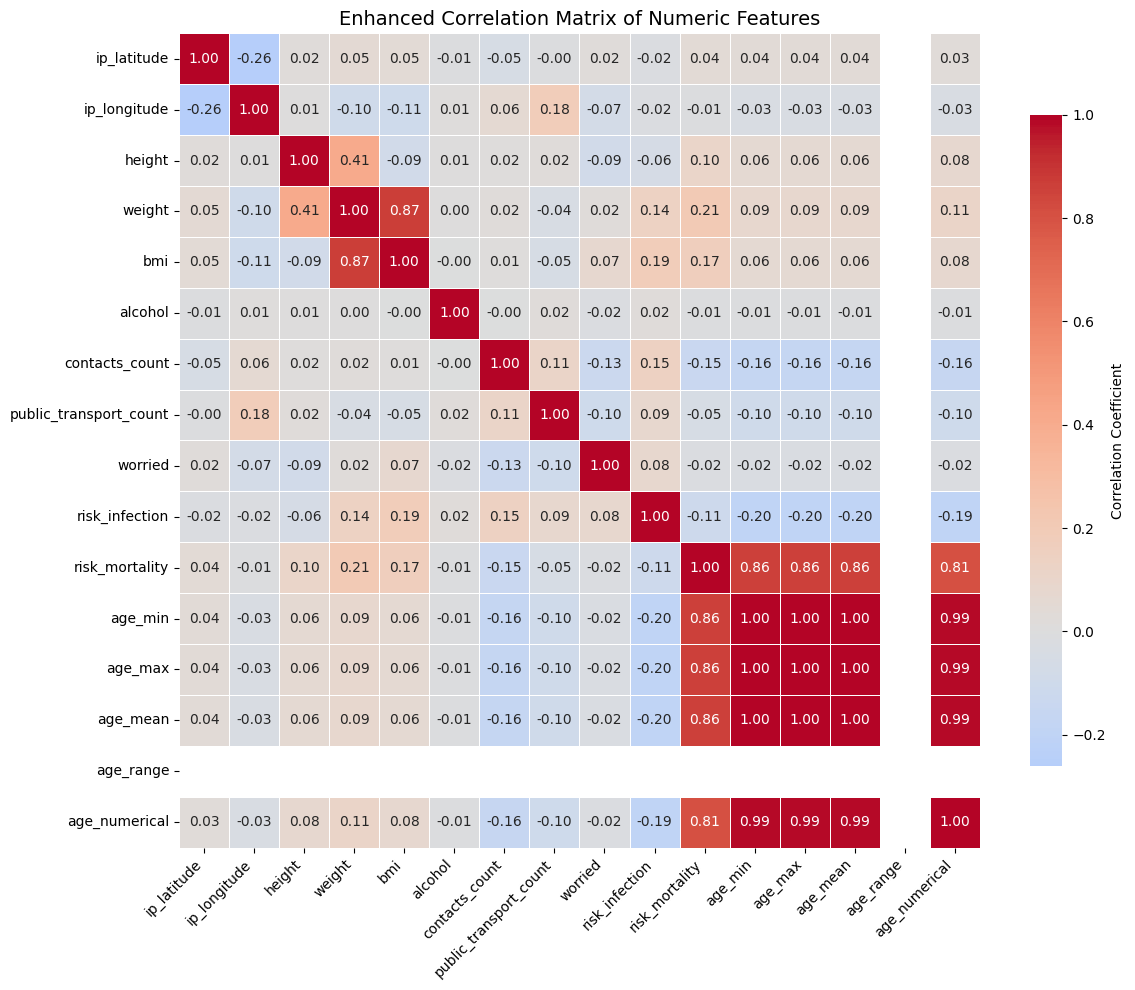

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assume 'df' is the original DataFrame with all data
# Select numeric columns for correlation matrix calculation
numeric_df = df.select_dtypes(include=['number'])

# Standardize data for better correlation insight
scaler = StandardScaler()
numeric_df = pd.DataFrame(scaler.fit_transform(numeric_df), columns=numeric_df.columns)

# Calculate and save the correlation matrix
correlation_matrix = numeric_df.corr()
correlation_matrix.to_csv("correlation_matrix.csv", index=True)
print("Correlation matrix saved to 'correlation_matrix.csv' for documentation.\n")

# Visualize the correlation matrix with enhancements
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt=".2f",  # Display values with two decimal places
            annot_kws={"size": 10},  # Adjust annotation font size
            cmap='coolwarm', 
            center=0, 
            linewidths=0.5,  # Add light gridlines for clarity
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})  # Customize color bar
plt.title("Enhanced Correlation Matrix of Numeric Features", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x labels for readability
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


### Identifying Highly Correlated Variable Pairs

Identifying pairs of variables with high correlation (absolute correlation > 0.8) helps reveal strong linear relationships that could lead to redundancy in data, as highly correlated variables tend to convey similar information. In data analysis, this redundancy can introduce issues like multicollinearity in models sensitive to variable dependencies.

#### Why a Threshold of 0.8?
The 0.8 threshold is a commonly used standard for identifying strong relationships while avoiding excessive overlap. Lower thresholds may capture too many moderately correlated pairs, whereas higher thresholds could miss important relationships.

#### Excluding Correlations of 1.0
Excluding correlations of 1.0 focuses the analysis on distinct pairs rather than including a variable’s perfect correlation with itself. This ensures the focus remains on meaningful variable interactions.

In [239]:
# Step 4: Identify high-correlation pairs (absolute correlation > 0.8)
threshold = 0.8
high_correlation_pairs = [
    (col1, col2) 
    for col1 in correlation_matrix.columns 
    for col2 in correlation_matrix.columns 
    if col1 != col2 and abs(correlation_matrix.loc[col1, col2]) > threshold
]

# Step 5: Save high-correlation pairs to a CSV file and display
high_corr_df = pd.DataFrame(high_correlation_pairs, columns=["Variable 1", "Variable 2"])
high_corr_df['Correlation'] = [correlation_matrix.loc[col1, col2] for col1, col2 in high_correlation_pairs]
high_corr_df.to_csv("high_correlation_pairs.csv", index=False)
print("Highly correlated variable pairs saved to 'high_correlation_pairs.csv' for documentation.\n")


Highly correlated variable pairs saved to 'high_correlation_pairs.csv' for documentation.



```markdown
### Highly Correlated Variable Pairs

The highly correlated variable pairs have been saved to `high_correlation_pairs.csv` for documentation.
```

In [240]:
# Identify pairs with high correlation (e.g., absolute correlation > 0.8)
print("Highly correlated variable pairs (absolute correlation > 0.8):\n", high_corr_df)

# Step 6: Handling Suggestions for Highly Correlated Pairs
print("\nRecommendations for Handling Highly Correlated Pairs:")
for col1, col2 in high_correlation_pairs:
    if "age" in col1 and "age" in col2:
        suggestion = f"  - {col1} and {col2} represent similar information about age. Consider dropping one or combining."
    elif "bmi" in [col1, col2] and "weight" in [col1, col2]:
        suggestion = f"  - {col1} and {col2} are related to body measurements. Consider using only one to avoid redundancy."
    else:
        suggestion = f"  - {col1} and {col2} may provide overlapping information. Consider keeping only one or creating a composite feature."
    print(f"({col1}, {col2}): {suggestion}")

# Interpretation Summary
print("\nInterpretation:")
print("This correlation analysis highlights pairs with high correlations, suggesting potential multicollinearity issues. "
      "The recommendations provided assist in handling these pairs through variable removal, combination, or transformation.")


Highly correlated variable pairs (absolute correlation > 0.8):
         Variable 1      Variable 2  Correlation
0           weight             bmi     0.870479
1              bmi          weight     0.870479
2   risk_mortality         age_min     0.864154
3   risk_mortality         age_max     0.864154
4   risk_mortality        age_mean     0.864154
5   risk_mortality   age_numerical     0.811945
6          age_min  risk_mortality     0.864154
7          age_min         age_max     1.000000
8          age_min        age_mean     1.000000
9          age_min   age_numerical     0.987140
10         age_max  risk_mortality     0.864154
11         age_max         age_min     1.000000
12         age_max        age_mean     1.000000
13         age_max   age_numerical     0.987140
14        age_mean  risk_mortality     0.864154
15        age_mean         age_min     1.000000
16        age_mean         age_max     1.000000
17        age_mean   age_numerical     0.987140
18   age_numerical  risk

### Selection of Variables with Higher Correlation and Particular Interests

To better understand the relationships between key health variables, we have selected variables that show higher correlation and are of particular interest for further analysis. These variables include:

- `height`
- `bmi`
- `risk_infection`
- `risk_mortality`

### Pairplot of Selected Health Variables

A pairplot is an effective way to visualize the relationships between multiple variables. It provides scatter plots for each pair of variables and histograms for individual variables, allowing us to observe potential correlations and distributions.

The following pairplot visualizes the selected health variables to help identify patterns and relationships within the dataset.

<Figure size 1200x1000 with 0 Axes>

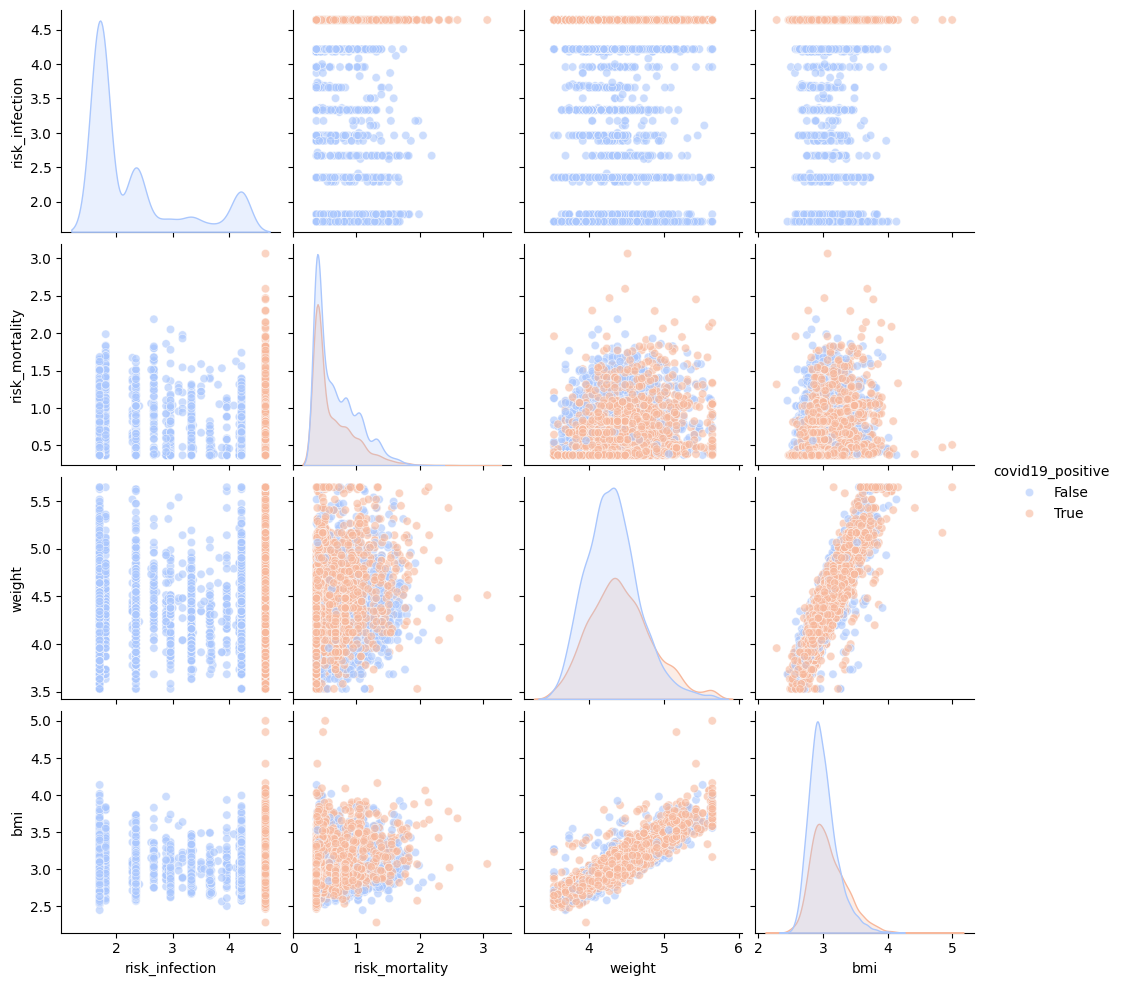

In [241]:
# Visualize the relationships between selected variables, it helps us 
# see any underlying pattern or correlations through the scatter plots and distributions
# Define the subset of columns to plot
subset_columns = ['risk_infection', 'risk_mortality', 'weight', 'bmi']
# Setting a hue variable
hue_variable = 'covid19_positive'  # Note you can also replace with other 
# categorical variables in df, like 'smoker'
# Create the pairplot with customizations, making it easier to read
plt.figure(figsize=(12, 10))
pairplot = sns.pairplot(df[subset_columns + [hue_variable]], 
                        hue=hue_variable, 
                        diag_kind="kde", 
                        palette="coolwarm", 
                        plot_kws={'alpha': 0.6})
# Show the plot
plt.show()


### Pairplot of Health Variables with Smoking and COVID-19 Positivity

To better understand the relationships between key health variables, we have selected variables that show higher correlation and are of particular interest for further analysis. These variables include:

- `height`
- `bmi`
- `risk_infection`
- `risk_mortality`

A pairplot is an effective way to visualize the relationships between multiple variables. It provides scatter plots for each pair of variables and histograms for individual variables, allowing us to observe potential correlations and distributions.

The following pairplot visualizes the selected health variables to help identify patterns and relationships within the dataset.

<Figure size 1200x1000 with 0 Axes>

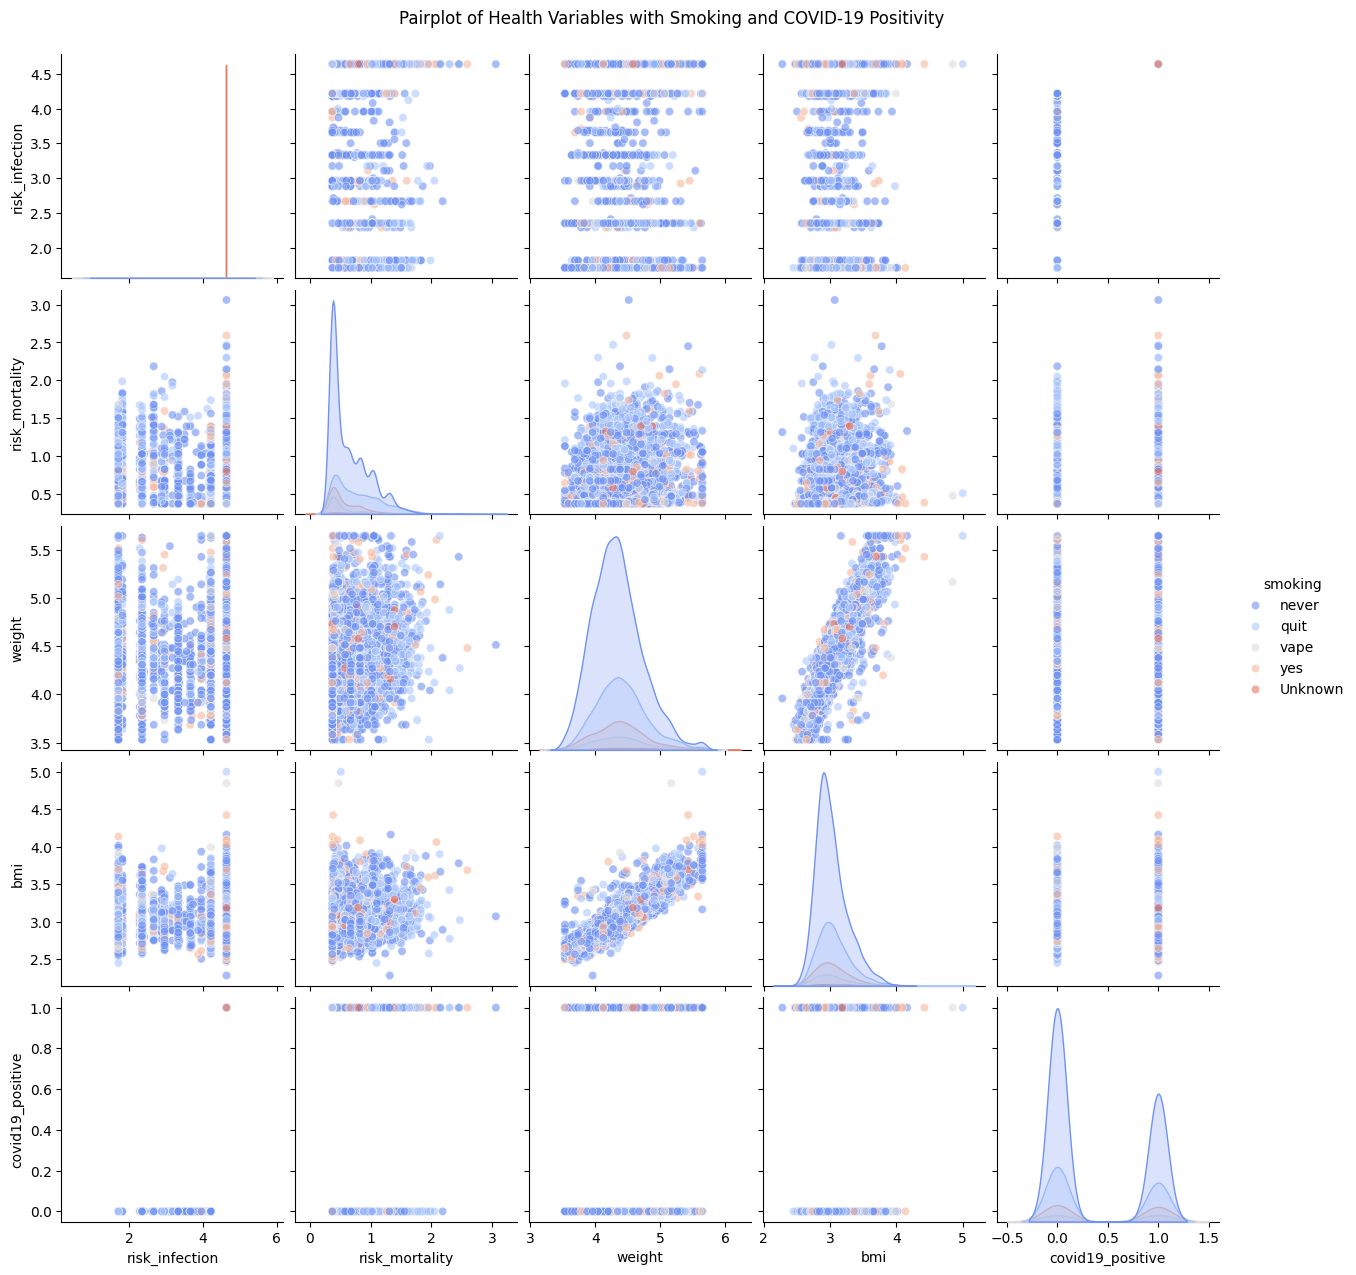

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define subset columns for analysis, e.g., demographic or health-related columns you wish to analyze
subset_columns = ['risk_infection', 'risk_mortality', 'weight', 'bmi']
hue_variable = 'smoking'  # Define hue variable to color by 'smoking' status

# Check if required columns are present in the DataFrame
missing_columns = [col for col in subset_columns + ['covid19_positive', 'smoking'] if col not in df.columns]

# If columns are missing, print an error message; otherwise, proceed with the plot
if missing_columns:
    print(f"The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Generate the pairplot with specified columns and customizations
    plt.figure(figsize=(12, 10))
    pairplot = sns.pairplot(df[subset_columns + ['covid19_positive', 'smoking']], hue=hue_variable, 
                            diag_kind="kde", palette="coolwarm", plot_kws={'alpha': 0.6})
    # Add title to the pairplot
    pairplot.fig.suptitle("Pairplot of Health Variables with Smoking and COVID-19 Positivity", y=1.02)
    # Show the plot
    plt.show()


### Pairplot Visualization and Feature Selection

The pairplot visualizes the relationship between the selected variables.

#### Feature Selection
Based on the correlation matrix, the following features have been included:
1. **Weight, BMI**: These have some correlations with each other and risk_mortality.
2. **Risk_infection, Risk_mortality**: These are important indicators related to health outcomes.
3. **Age_mean**: An aggregate age feature.

### Identifying the Most Suitable Data Mining Task

#### Classification Model Using Random Forest
I am using `RandomForestClassifier` for classification, which is appropriate for binary target variables and can handle mixed data types.

In [243]:
# Code uses Random Forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Derived feature: Interaction between BMI and infection_risk
df['bmi_risk_infection_interaction'] = df['bmi'] * df['risk_infection']

# Selecting features based on relevance to COVID-19 positivity
features = df[['weight', 'bmi', 'risk_infection', 'risk_mortality', 'age_mean', 'public_transport_count', 'contacts_count', 'bmi_risk_infection_interaction']]
target = df['covid19_positive']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Training the Model
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Making Predictions
y_pred = classifier.predict(X_test)

# Generating report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1030
         1.0       1.00      1.00      1.00       696

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



### Clustering with K-Means (Alternative Approach)

In this section, we explore an alternative approach to clustering using the K-Means algorithm. This method is particularly useful for segmenting the dataset into distinct groups based on similarities in the data.

#### Steps for K-Means Clustering

1. **Data Preparation:**
    - Select relevant features for clustering.
    - Standardize the data to ensure all features contribute equally to the distance calculations.

2. **Choosing the Number of Clusters:**
    - Use the Elbow method to determine the optimal number of clusters.
    - Plot the Within-Cluster Sum of Squares (WCSS) against the number of clusters to identify the "elbow point."

3. **Applying K-Means:**
    - Fit the K-Means algorithm to the standardized data.
    - Assign cluster labels to each data point.

4. **Cluster Analysis:**
    - Analyze the characteristics of each cluster.
    - Visualize the clusters to understand the distribution and separation.

#### Code Example

```python
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Select relevant features for clustering
features = df[['height', 'weight', 'bmi', 'risk_infection', 'risk_mortality']]

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 2: Choosing the Number of Clusters
# Use the Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, random_state=42)
     kmeans.fit(scaled_features)
     wcss.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Step 3: Applying K-Means
# Fit the K-Means algorithm with the optimal number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original dataframe
df['cluster'] = cluster_labels

# Step 4: Cluster Analysis
# Analyze the characteristics of each cluster
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features.columns)
print("Cluster Centers:\n", cluster_df)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()
```

#### Benefits of K-Means Clustering

- **Simplicity:** Easy to implement and interpret.
- **Scalability:** Efficient for large datasets.
- **Flexibility:** Can be applied to various types of data.

By following this alternative approach, we can effectively segment the dataset into meaningful clusters, providing valuable insights for further analysis.

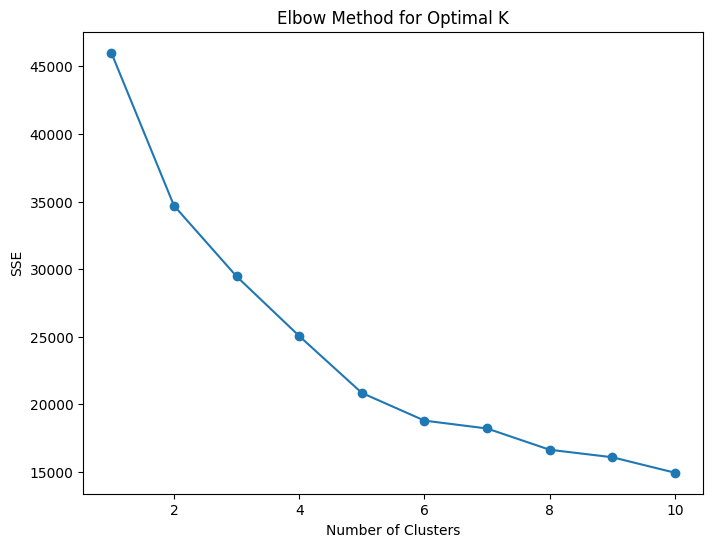

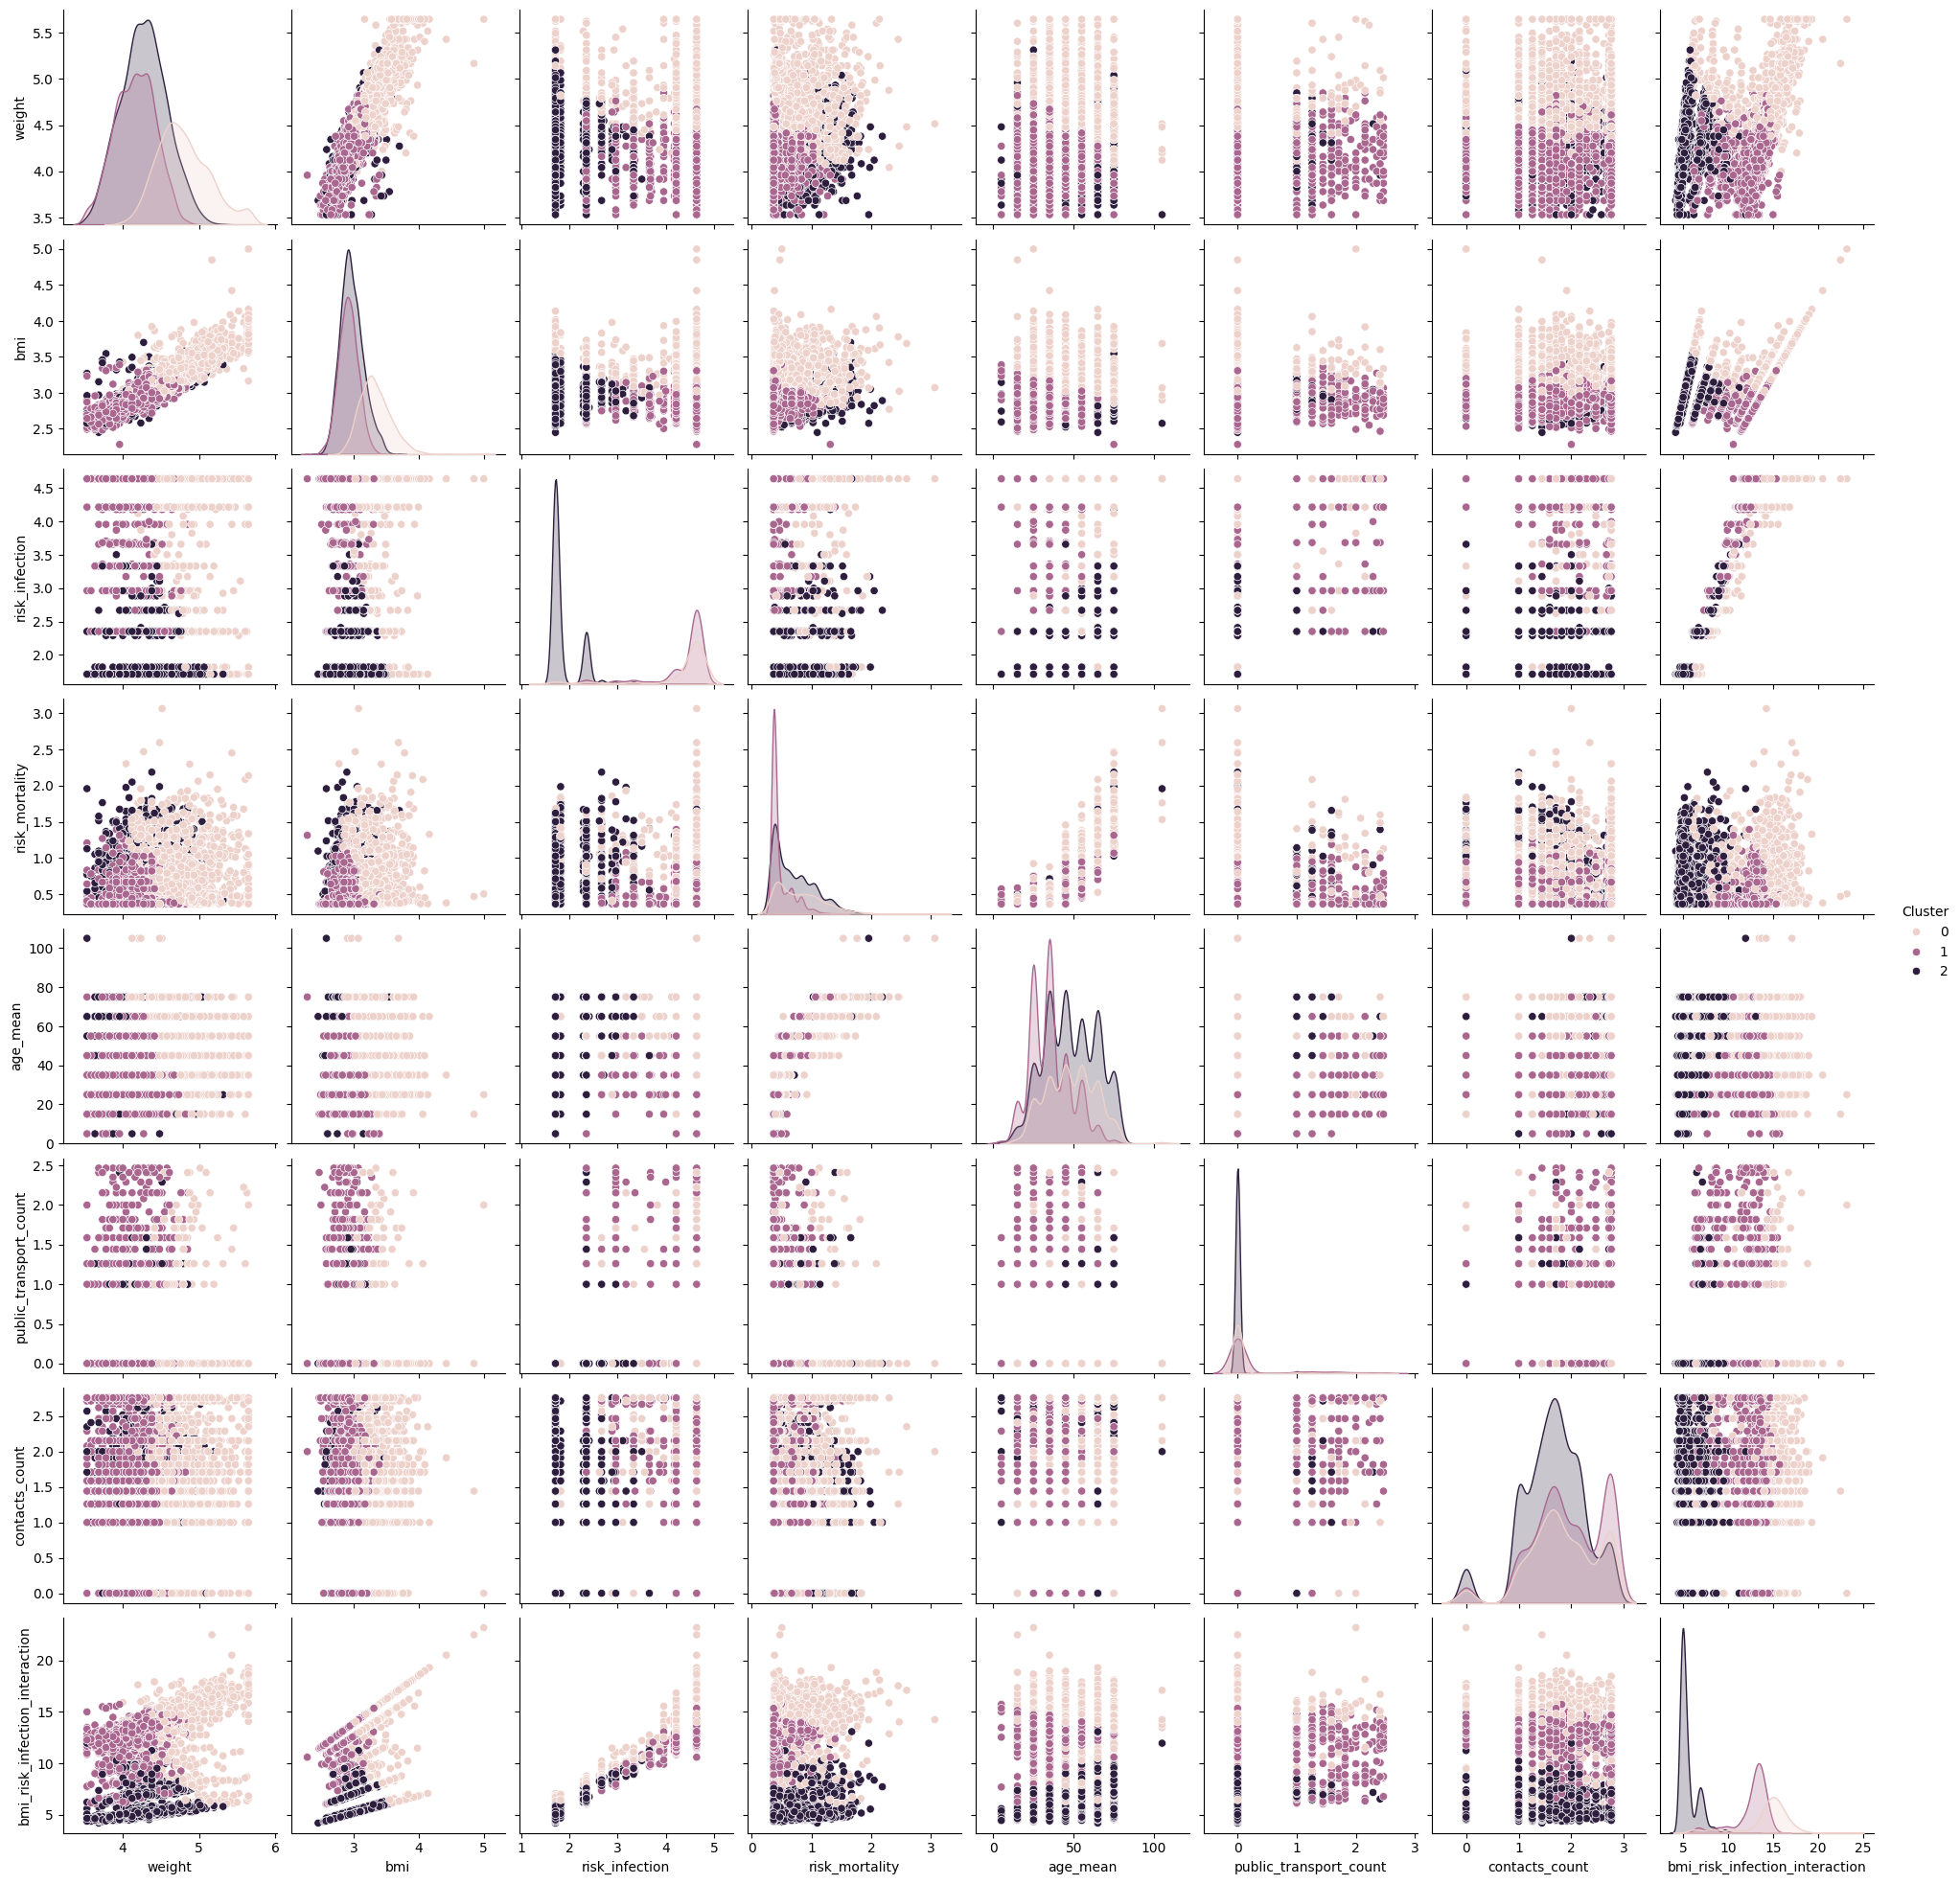

In [244]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Derived feature: Interaction between BMI and infection_risk
df['bmi_risk_infection_interaction'] = df['bmi'] * df['risk_infection']

# Selecting features for clustering
clustering_features = df[['weight', 'bmi', 'risk_infection', 'risk_mortality', 'age_mean', 'public_transport_count', 'contacts_count', 'bmi_risk_infection_interaction']]

# Standardizing features for K-Means clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Using the Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

# Visualizing the clusters
sns.pairplot(df, hue='Cluster', vars=clustering_features.columns)
plt.show()